In [2]:
import sys
sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../..")
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import configure_seaborn
configure_seaborn()

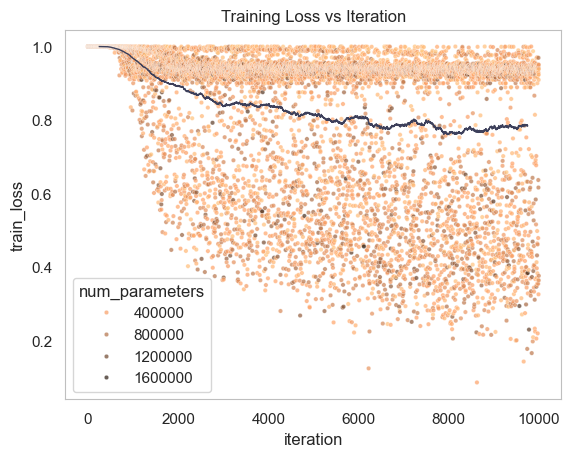

In [3]:
df = pd.read_csv("supernet_result.csv")
sns.scatterplot(data=df, x="iteration", y="train_loss", hue="num_parameters", alpha=0.7, s=10, palette="copper_r")
plt.title("Training Loss vs Iteration")

# Calculate and plot rolling mean
window_size = 500
rolling_mean = df.groupby('iteration')['train_loss'].mean().rolling(window=window_size, center=True).mean()
plt.plot(rolling_mean.index, rolling_mean.values, linewidth=1, label=f'Rolling Mean (window={window_size})')
plt.show()

<Axes: xlabel='iteration', ylabel='num_parameters'>

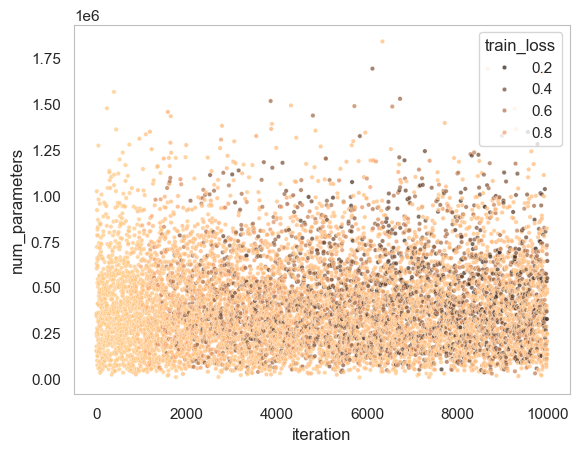

In [4]:
sns.scatterplot(data=df, x="iteration", y="num_parameters", hue="train_loss", alpha=0.7, s=10, palette="copper")

<Axes: xlabel='num_parameters', ylabel='train_loss'>

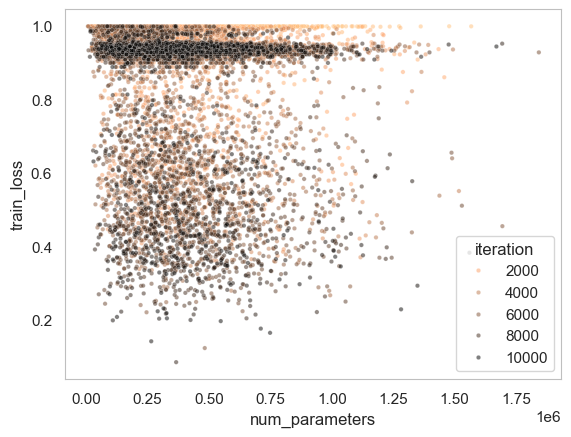

In [5]:
sns.scatterplot(data=df, x="num_parameters", y="train_loss", hue="iteration", alpha=0.5, s=10, palette="copper_r")

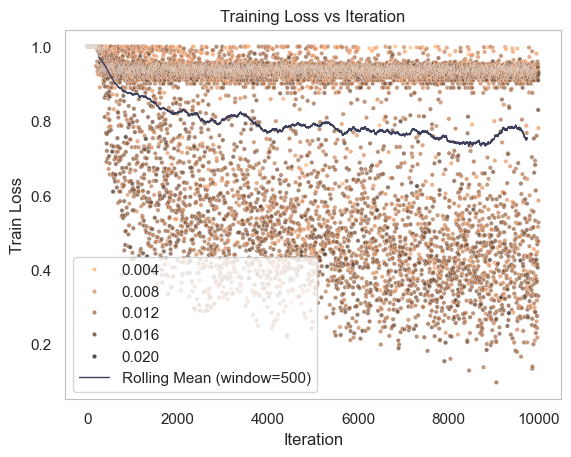

In [12]:
df2 = pd.read_csv("../../../results/pareto_nrpa/df_history.csv")
df2["iteration"] = df2.index
df2 = df2[df2["iteration"] <= 10000]
df2["val_loss"] = df2["F"].apply(lambda x: eval(x)[0])
df2["latency"] = df2["F"].apply(lambda x: eval(x)[1])
sns.scatterplot(data=df2, x="iteration", y="val_loss", hue="latency", alpha=0.7, s=10, palette="copper_r")
plt.xlabel("Iteration")
plt.ylabel("Train Loss")
plt.title("Training Loss vs Iteration")

# Calculate and plot rolling mean
window_size = 500
rolling_mean_nrpa = df2.groupby('iteration')['val_loss'].mean().rolling(window=window_size, center=True).mean()
plt.plot(rolling_mean_nrpa.index, rolling_mean_nrpa.values, linewidth=1, label=f'Rolling Mean (window={window_size})')
plt.legend()
plt.show()

Text(0, 0.5, 'Validation Loss')

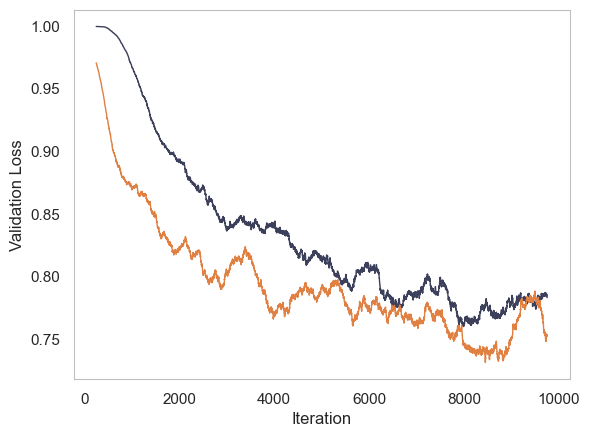

In [13]:
plt.plot(rolling_mean.index, rolling_mean.values, linewidth=1, label=f'Random')
plt.plot(rolling_mean_nrpa.index, rolling_mean_nrpa.values, linewidth=1, label=f'NRPA')
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")

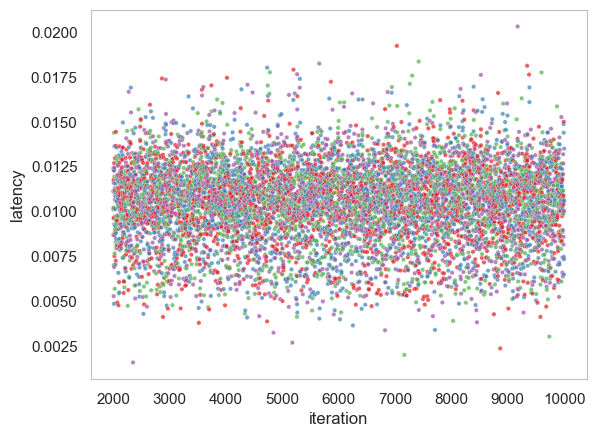

In [14]:
sns.scatterplot(data=df2.iloc[2000:], x="iteration", y="latency", hue="P", alpha=0.7, s=10, palette="Set1", legend=False)

plt.show()

<Axes: xlabel='latency', ylabel='val_loss'>

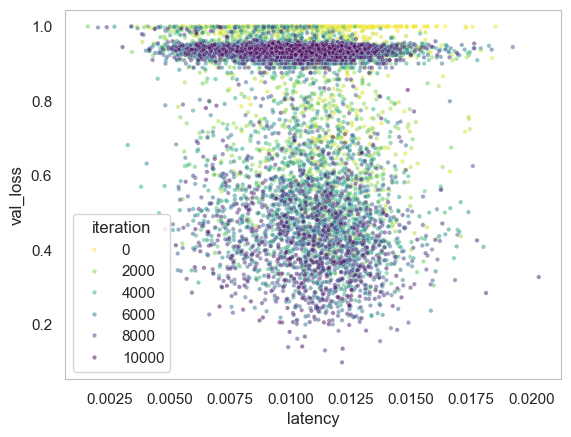

In [15]:
sns.scatterplot(data=df2, x="latency", y="val_loss", hue="iteration", alpha=0.5, s=10, palette="viridis_r")

<Axes: xlabel='latency', ylabel='Count'>

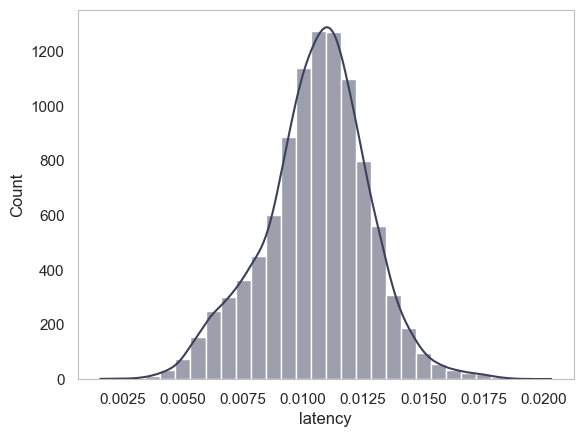

In [16]:
sns.histplot(df2['latency'], bins=30, kde=True)

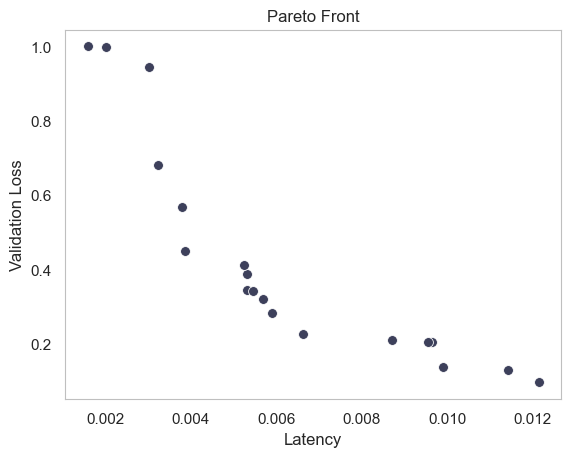

In [17]:
import pymoo
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
# Get non-dominated set
F = df2[['val_loss', 'latency']].values
nds = NonDominatedSorting()
front_indices = nds.do(F, only_non_dominated_front=True)
df_pareto_nrpa = df2.iloc[front_indices]

# Plot non-dominated solutions
sns.scatterplot(data=df_pareto_nrpa, x="latency", y="val_loss", s=50)
plt.xlabel("Latency")
plt.ylabel("Validation Loss")
plt.title("Pareto Front")
plt.show()

In [18]:
df_pareto_nrpa.sort_values(by="val_loss").head(100)

,X,F,P,iteration,val_loss,latency
9063,"[[""encoder_0_channels"", 8], [""encoder_1_channe...","[0.09701776504516602, 0.012141585350036621]",1,9063,0.097018,0.012142
8459,"[[""encoder_0_channels"", 16], [""encoder_1_chann...","[0.12913674116134644, 0.011432766914367676]",2,8459,0.129137,0.011433
8780,"[[""encoder_0_channels"", 8], [""encoder_1_channe...","[0.13800615072250366, 0.00990593433380127]",2,8780,0.138006,0.009906
9459,"[[""encoder_0_channels"", 16], [""encoder_1_chann...","[0.20423775911331177, 0.00965723991394043]",2,9459,0.204238,0.009657
9748,"[[""encoder_0_channels"", 64], [""encoder_1_chann...","[0.20465272665023804, 0.009548521041870118]",2,9748,0.204653,0.009549
9916,"[[""encoder_0_channels"", 64], [""encoder_1_chann...","[0.20968282222747803, 0.008718299865722656]",0,9916,0.209683,0.008718
8213,"[[""encoder_0_channels"", 16], [""encoder_1_chann...","[0.22570449113845825, 0.0066285371780395504]",3,8213,0.225704,0.006629
9438,"[[""encoder_0_channels"", 16], [""encoder_1_chann...","[0.2843249440193176, 0.005910658836364746]",3,9438,0.284325,0.005911
9174,"[[""encoder_0_channels"", 8], [""encoder_1_channe...","[0.3215300440788269, 0.0056911945343017575]",3,9174,0.321530,0.005691
7060,"[[""encoder_0_channels"", 16], [""encoder_1_chann...","[0.3426988124847412, 0.005448532104492187]",0,7060,0.342699,0.005449


In [22]:
from omegaconf import OmegaConf
from search_spaces.dag_search_space.radar_node import RadarNode
from search_spaces.dag_search_space.network_structure import RadarNetwork
from search_spaces.dag_search_space.supernet import SuperNet
cfg = {
    "name": "radar",
    "n_objectives": 2,
    "dataset_path": "data/train_bth/mat",
    "batch_size": 8,
    "supernet": {
        "channel_options": [8, 16, 32, 64],
        "in_channels": 1,
        "initial_channels": 8,
        "num_encoder_stages": 3,
        "num_nodes": 5,
        "n_steps": 1
    }
}
cfg = OmegaConf.create(cfg)


In [23]:
best_net = df["train_loss"].idxmin()
cell_str = df.loc[best_net, "arch_str"]
print("Best architecture found by random search:")
print(cell_str)

best2 = df2['val_loss'].idxmin()
cell_str2 = df2.loc[8213, "X"]
print("Best architecture found by NRPA:")
print(cell_str2)
x2 = eval(cell_str2)
print(len(x2))

node_cell = RadarNode(cfg)
for ac in x2:
    node_cell.play_action(ac)
net = SuperNet(in_channels=1, initial_channels=8, channel_options=[8,16,32,64], num_encoder_stages=3, num_nodes=5)
chosen_net = net.sample(node_cell)
chosen_net.prune_cells()
print(f"N params: {sum(p.numel() for p in chosen_net.parameters())}")

Best architecture found by random search:
32:8:16:16:64:16:64|c1x5:id:z:c1x3:c1x3:c1x1:c1x5:id:id:c1x3
Best architecture found by NRPA:
[["encoder_0_channels", 16], ["encoder_1_channels", 64], ["encoder_2_channels", 8], ["bottleneck_channels", 8], ["decoder_2_channels", 64], ["decoder_1_channels", 64], ["decoder_0_channels", 16], ["edge_0_1", "none"], ["edge_0_2", "depthwise_conv_3x3"], ["edge_1_2", "depthwise_conv_3x3"], ["edge_0_3", "conv_1x1"], ["edge_1_3", "dilated_conv_3x3_r4"], ["edge_2_3", "dilated_conv_3x3_r4"], ["edge_0_4", "conv_1x3_3x1"], ["edge_1_4", "conv_1x3_3x1"], ["edge_2_4", "identity"], ["edge_3_4", "dilated_conv_3x3_r2"]]
17
N params: 338473


In [24]:

for row in df_pareto_nrpa.sort_values(by="val_loss", ascending=False).iterrows():
    node = RadarNode(cfg)
    x = eval(row[1]["X"])
    for a in x:
        node.play_action(a)

    net = SuperNet(in_channels=1, initial_channels=8, channel_options=[8,16,32,64], num_encoder_stages=3, num_nodes=5)
    nnet = net.sample(node)
    nnet.prune_cells()
    print(f"N params: {sum(p.numel() for p in nnet.parameters())}, val_loss: {row[1]['val_loss']:.4f}, latency: {row[1]['latency']*1000:.4f} ms")

N params: 4905, val_loss: 0.9997, latency: 1.5910 ms
N params: 8681, val_loss: 0.9968, latency: 2.0110 ms
N params: 76953, val_loss: 0.9444, latency: 3.0319 ms
N params: 125273, val_loss: 0.6810, latency: 3.2474 ms
N params: 54073, val_loss: 0.5689, latency: 3.7979 ms
N params: 66209, val_loss: 0.4507, latency: 3.8775 ms
N params: 70721, val_loss: 0.4117, latency: 5.2424 ms
N params: 302441, val_loss: 0.3893, latency: 5.3193 ms
N params: 294297, val_loss: 0.3449, latency: 5.3221 ms
N params: 73889, val_loss: 0.3427, latency: 5.4485 ms
N params: 174297, val_loss: 0.3215, latency: 5.6912 ms
N params: 237145, val_loss: 0.2843, latency: 5.9107 ms
N params: 338473, val_loss: 0.2257, latency: 6.6285 ms
N params: 462489, val_loss: 0.2097, latency: 8.7183 ms
N params: 694297, val_loss: 0.2047, latency: 9.5485 ms
N params: 612929, val_loss: 0.2042, latency: 9.6572 ms
N params: 275001, val_loss: 0.1380, latency: 9.9059 ms
N params: 358737, val_loss: 0.1291, latency: 11.4328 ms
N params: 986137, 

In [27]:
net = SuperNet(in_channels=1, initial_channels=8, channel_options=[8,16,32,64], num_encoder_stages=3, num_nodes=5)
nnet = net.sample(node_cell)
nnet.prune_cells()
print(f"N params: {sum(p.numel() for p in nnet.parameters())}")

N params: 338473


In [28]:
print(node_cell.to_str())

16:64:8:8:16:64:64|z:dw3x3:dw3x3:c1x1:d3r4:d3r4:c1x3:c1x3:id:d3r2


In [29]:
import time
x = torch.randn(1, 1, 256, 256).to("cuda:0")
#Time on GPU
nnet.to("cuda:0")
with torch.no_grad():
    y = nnet(x)
    t0 = time.time()
    for i in range(100):
        y = nnet(x)
    t1 = time.time()
    print(f"Avg inference time on GPU: {(t1 - t0)/100:.6f} seconds")

x = torch.randn(1, 1, 256, 256).to("cpu")
#Time on CPU
nnet.to("cpu")
with torch.no_grad():
    y = nnet(x)
    t0 = time.time()
    for i in range(10):
        y = nnet(x)
    t1 = time.time()
    print(f"Avg inference time on CPU: {(t1 - t0)/10:.6f} seconds")

Avg inference time on GPU: 0.005335 seconds
Avg inference time on CPU: 0.077618 seconds


In [46]:
from utils.models.unet import UNet
unet = UNet(in_channels=1, out_channels=1, initial_channels=8, features=[16, 32, 64])
unet.to("cuda:0")
x = torch.randn(1, 1, 256, 256).to("cuda:0")
with torch.no_grad():
    y = unet    (x)
    t0 = time.time()
    for i in range(100):
        y = unet(x)
    t1 = time.time()
    print(f"Avg inference time of standard UNet on GPU: {(t1 - t0)/100:.6f} seconds")

# Inference time on CPU
unet.to("cpu")
x = torch.randn(1, 1, 256, 256).to("cpu")
with torch.no_grad():
    y = unet(x)
    t0 = time.time()
    for i in range(10):
        y = unet(x)
    t1 = time.time()
    print(f"Avg inference time of standard UNet on CPU: {(t1 - t0)/10:.6f} seconds")
unet_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters in UNet: {unet_params}")

Avg inference time of standard UNet on GPU: 0.002672 seconds
Avg inference time of standard UNet on CPU: 0.027338 seconds
Number of parameters in UNet: 586953


In [45]:
import importlib
importlib.reload(sys.modules['utils.models.mvnet'])
from utils.models.mvnet import MVNet
from utils.models.tmvanet import TMVANet

mvnet = MVNet(1, 1)
mvnet.to("cuda:0")
x = torch.randn(1, 1, 256, 256).to("cuda:0")
with torch.no_grad():
    y = mvnet(x)
    t0 = time.time()
    for i in range(100):
        y = mvnet(x)
    t1 = time.time()
    print(f"Avg inference time of MVNet on GPU: {(t1 - t0)/100:.6f} seconds")

# Inference time on CPU
mvnet.to("cpu")
x = torch.randn(1, 1, 256, 256).to("cpu")
with torch.no_grad():
    y = mvnet(x)
    t0 = time.time()
    for i in range(10):
        y = mvnet(x)
    t1 = time.time()
    print(f"Avg inference time of MVNet on CPU: {(t1 - t0)/10:.6f} seconds")
# Number of parameters comparison
mvnet_params = sum(p.numel() for p in mvnet.parameters())
print(f"Number of parameters in MVNet: {mvnet_params}")

Avg inference time of MVNet on GPU: 0.014283 seconds
Avg inference time of MVNet on CPU: 0.377118 seconds
Number of parameters in MVNet: 1135873


In [ ]:
from performance_characterization.efficientnet import EfficientNetSegmentation

efnet = EfficientNetSegmentation(in_channels=1, out_channels=1)
efnet.to("cuda:0")
x = torch.randn(1, 1, 256, 256).to("cuda:0")
with torch.no_grad():
    y = efnet(x)
    t0 = time.time()
    for i in range(100):
        y = efnet(x)
    t1 = time.time()
    print(f"Avg inference time of EfficientNet on GPU: {(t1 - t0)/100:.6f} seconds")

# Inference time on CPU
efnet.to("cpu")
x = torch.randn(1, 1, 256, 256).to("cpu")
with torch.no_grad():
    y = efnet(x)
    t0 = time.time()
    for i in range(10):
        y = efnet(x)
    t1 = time.time()
    print(f"Avg inference time of EfficientNet on CPU: {(t1 - t0)/10:.6f} seconds")

Avg inference time of EfficientNet on GPU: 0.007426 seconds
Avg inference time of EfficientNet on CPU: 0.196687 seconds


In [ ]:
from performance_characterization.optimize_model import optimize_and_export_to_onnx
optimize_and_export_to_onnx(nnet, file_path="best_nrpa_model.onnx")
optimize_and_export_to_onnx(model, file_path="unet.onnx")

Exporting to ONNX...
Simplifying ONNX graph...
Optimization complete. Saved to 'best_nrpa_model_sim.onnx'


NameError: name 'model' is not defined

In [ ]:
# Testing the speed of cells
cell = chosen_net.encoder_cells[1]
cell.to("cuda:0")
print(cell)

x = torch.randn(1, 16, 256, 256).to("cuda:0")
s = cell(x)
print(s.shape)
t1 = time.time()
for i in range(100):
    _ = cell(x)
t2 = time.time()
print(f"Avg inference time of cell on GPU: {(t2 - t1)/100}")
print(f"N params: {sum(p.numel() for p in cell.parameters())}")

RadarCell(
  (layers): ModuleDict(
    (node_1): ModuleDict(
      (edge_0_1): DepthwiseConv3x3(
        (depthwise): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (pointwise): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (node_2): ModuleDict(
      (edge_0_2): Conv1x1(
        (conv): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (edge_1_2): DilatedConv3x3_r4(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
    )
    (nod

In [ ]:
from utils.models.unet import DoubleConv
double_conv = DoubleConv(in_channels=16, out_channels=64)
double_conv.to("cuda:0")
print(double_conv)
x = torch.randn(1, 16, 256, 256).to("cuda:0")
double_conv(x)
t1 = time.time()
for i in range(100):
    _ = double_conv(x)
t2 = time.time()
print(f"Avg inference time of DoubleConv on GPU: {(t2 - t1)/100}")
# Print number of parameters 
print(f"N params: {sum(p.numel() for p in double_conv.parameters())}")

DoubleConv(
  (block): Sequential(
    (0): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
)
Avg inference time of DoubleConv on GPU: 0.00030147075653076173
N params: 46464


In [ ]:
import torch.nn as nn
from search_spaces.operations import DepthwiseConv3x3

# Compare DepthwiseConv 3x3 vs normal Conv 3x3 (32->64 channels)

# Create depthwise conv and normal conv
depthwise_conv = nn.Sequential(DepthwiseConv3x3(in_channels=32, out_channels=64), 
                               nn.BatchNorm2d(64),
                               nn.ReLU(inplace=True))
normal_conv = nn.Sequential(
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True)
)

# Test on GPU
depthwise_conv.to("cuda:0")
normal_conv.to("cuda:0")
x_gpu = torch.randn(1, 32, 256, 256).to("cuda:0")

# Warm up
with torch.no_grad():
    _ = depthwise_conv(x_gpu)
    _ = normal_conv(x_gpu)

# Time depthwise conv on GPU
with torch.no_grad():
    t0 = time.time()
    for i in range(1000):
        _ = depthwise_conv(x_gpu)
    t1 = time.time()
    print(f"Avg inference time of DepthwiseConv3x3 on GPU: {(t1 - t0)/1000:.6f} seconds")

# Time normal conv on GPU
with torch.no_grad():
    t0 = time.time()
    for i in range(1000):
        _ = normal_conv(x_gpu)
    t1 = time.time()
    print(f"Avg inference time of Normal Conv3x3 on GPU: {(t1 - t0)/1000:.6f} seconds")

# Test on CPU
depthwise_conv.to("cpu")
normal_conv.to("cpu")
x_cpu = torch.randn(1, 32, 256, 256).to("cpu")

# Warm up
with torch.no_grad():
    _ = depthwise_conv(x_cpu)
    _ = normal_conv(x_cpu)

# Time depthwise conv on CPU
with torch.no_grad():
    t0 = time.time()
    for i in range(1000):
        _ = depthwise_conv(x_cpu)
    t1 = time.time()
    print(f"Avg inference time of DepthwiseConv3x3 on CPU: {(t1 - t0)/1000:.6f} seconds")

# Time normal conv on CPU
with torch.no_grad():
    t0 = time.time()
    for i in range(1000):
        _ = normal_conv(x_cpu)
    t1 = time.time()
    print(f"Avg inference time of Normal Conv3x3 on CPU: {(t1 - t0)/1000:.6f} seconds")

# Print parameter counts
print(f"\nDepthwiseConv3x3 params: {sum(p.numel() for p in depthwise_conv.parameters())}")
print(f"Normal Conv3x3 params: {sum(p.numel() for p in normal_conv.parameters())}")

Avg inference time of DepthwiseConv3x3 on GPU: 0.000563 seconds
Avg inference time of Normal Conv3x3 on GPU: 0.000476 seconds
Avg inference time of DepthwiseConv3x3 on CPU: 0.013446 seconds
Avg inference time of Normal Conv3x3 on CPU: 0.010773 seconds

DepthwiseConv3x3 params: 2592
Normal Conv3x3 params: 18560


In [ ]:
import torch
import torch.nn as nn
import time

# Compare at EQUAL parameter budgets
# Normal conv: 32->64 = 18,560 params
# Depthwise conv: We can afford 32->64->128 with similar params

class DepthwiseBlock(nn.Module):
    """Depthwise separable: 32->64->128"""
    def __init__(self):
        super().__init__()
        self.dw1 = nn.Conv2d(32, 32, 3, padding=1, groups=32, bias=False)
        self.pw1 = nn.Conv2d(32, 64, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.dw2 = nn.Conv2d(64, 64, 3, padding=1, groups=64, bias=False)
        self.pw2 = nn.Conv2d(64, 128, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.relu(self.bn1(self.pw1(self.dw1(x))))
        x = self.relu(self.bn2(self.pw2(self.dw2(x))))
        return x

class NormalBlock(nn.Module):
    """Normal conv: 32->64->128"""
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(32, 64, 3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        return x

dw_block = DepthwiseBlock()
normal_block = NormalBlock()

print(f"DepthwiseBlock params: {sum(p.numel() for p in dw_block.parameters()):,}")
print(f"NormalBlock params: {sum(p.numel() for p in normal_block.parameters()):,}")
print(f"Param ratio: {sum(p.numel() for p in normal_block.parameters()) / sum(p.numel() for p in dw_block.parameters()):.1f}x more in normal")

# Benchmark on GPU
device = "cuda:0"
dw_block.to(device).eval()
normal_block.to(device).eval()
x = torch.randn(1, 32, 256, 256, device=device)

# Warmup
with torch.no_grad():
    for _ in range(10):
        _ = dw_block(x)
        _ = normal_block(x)
    torch.cuda.synchronize()

# Benchmark
with torch.no_grad():
    torch.cuda.synchronize()
    t0 = time.time()
    for _ in range(100):
        _ = dw_block(x)
    torch.cuda.synchronize()
    dw_time = (time.time() - t0) / 100

    torch.cuda.synchronize()
    t0 = time.time()
    for _ in range(100):
        _ = normal_block(x)
    torch.cuda.synchronize()
    normal_time = (time.time() - t0) / 100

print(f"\nGPU - DepthwiseBlock: {dw_time*1000:.3f} ms")
print(f"GPU - NormalBlock: {normal_time*1000:.3f} ms")
print(f"GPU speedup of normal: {dw_time/normal_time:.2f}x")

# Benchmark on CPU (simulates edge device better)
dw_block.to("cpu").eval()
normal_block.to("cpu").eval()
x_cpu = torch.randn(1, 32, 256, 256)

with torch.no_grad():
    t0 = time.time()
    for _ in range(10):
        _ = dw_block(x_cpu)
    dw_time_cpu = (time.time() - t0) / 10

    t0 = time.time()
    for _ in range(10):
        _ = normal_block(x_cpu)
    normal_time_cpu = (time.time() - t0) / 10

print(f"\nCPU - DepthwiseBlock: {dw_time_cpu*1000:.3f} ms")
print(f"CPU - NormalBlock: {normal_time_cpu*1000:.3f} ms")
print(f"CPU speedup of normal: {dw_time_cpu/normal_time_cpu:.2f}x")

DepthwiseBlock params: 11,488
NormalBlock params: 92,544
Param ratio: 8.1x more in normal

GPU - DepthwiseBlock: 1.654 ms
GPU - NormalBlock: 1.754 ms
GPU speedup of normal: 0.94x

CPU - DepthwiseBlock: 48.296 ms
CPU - NormalBlock: 72.042 ms
CPU speedup of normal: 0.67x
